# Homework6: Clustering with Gaussian Mixture Model

In [1]:
#reference to understand how it's implemented and use my own implementation
#https://stackoverflow.com/questions/52887562/how-to-implement-gmm-clustering-em-algorighmexpectation-maximisation-algorithm

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import six
from six.moves import range

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
X = np.loadtxt('iris.data', dtype='object', delimiter=',')
Y = X[:,-1]
X = X[:, :-1].astype('f')
X.shape, Y.shape, Y.dtype

((150, 4), (150,), dtype('O'))

`X` is a `NxK` float matrix where each row (`X[i]`) corresponds to a data point.

In [5]:
from scipy.stats import multivariate_normal
def gmm(X, n_classes, n_iter):

    #n -> number, d -> dimension
    k = n_classes       
    n, d = X.shape
    
    weights = np.array([1./ k] *  k)
    means = np.array(X[np.random.choice(n,  k, False), :])
    
    #covariance matrix
    cov = np.array([np.eye(d)] * k)
    r_ic = np.zeros((n, k))
    
    #P -> Prob formula 
    P = lambda mu, s: np.linalg.det(s) ** -.5 * (2 * np.pi) ** (-X.shape[1]/2.) \
                * np.exp(-.5 * np.einsum('ij, ij -> i',\
                        X - mu, np.dot(np.linalg.inv(s) , (X - mu).T).T ) ) 
    
    log_likelihoods = []
    for itr in range(n_iter):
        for c in range(k):# E_Step
            r_ic[:, c] = weights[c] * P(means[c], cov[c])
            
        log_likelihood = np.sum(np.log(np.sum(r_ic, axis=1)))
        log_likelihoods.append(log_likelihood)
        
        # r_ic -> Normalizing, m_ic -> maximizing, weights -> updating...
        r_ic = (r_ic.T / np.sum(r_ic, axis = 1)).T            
        m_c = np.sum(r_ic, axis=0)
        weights = m_c / np.sum(r_ic)

        for c in range(k):
            # Updating...
            # means[c] -> mean, cov[c] -> covariance
            means[c] = 1. / m_c[c] * np.sum( r_ic[:,c].reshape(X.shape[0],1) * X , axis=0)
            x_mu = X - means[c]
            cov[c] = (1. / m_c[c]) * np.dot( (r_ic[:,c].reshape(X.shape[0],1) * x_mu ).T, x_mu)
    
    # RETURN Highest prob
    class_assignments = np.argmax(r_ic, axis=1)
    
    return class_assignments, means, cov

## Visualization: a Cross Section

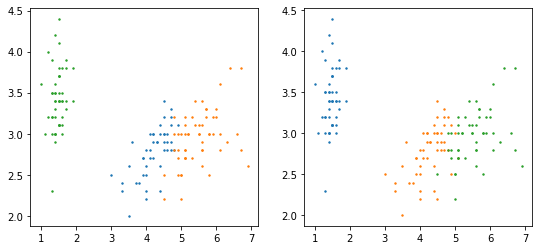

In [6]:
class_assignments, mean, cov = gmm(X, 3, 250)  # You may want to tune the number of iterations
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(X[class_assignments==k, 2], X[class_assignments==k, 1], s=2)
plt.subplot(122)
for k, class_name in enumerate(np.unique(Y)):
    plt.scatter(X[Y==class_name, 2], X[Y==class_name, 1], s=2)

## Visualization: PCA Projection

In [7]:
evals, evecs = np.linalg.eigh(np.cov(X.T))
to_crd = lambda x: ((x-x.mean(axis=0))@evecs)[:,-2:]
crds = to_crd(X)

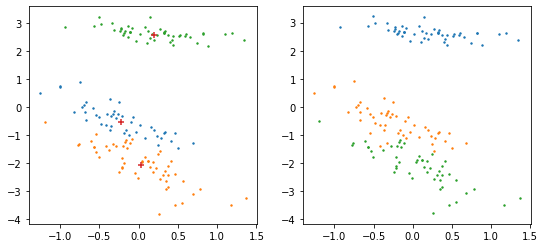

In [8]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(crds[class_assignments==k, 0], crds[class_assignments==k, 1], s=2)
plt.scatter(to_crd(mean)[:,0], to_crd(mean)[:,1], s=30, marker='+')
plt.subplot(122)
for k in np.unique(Y):
    plt.scatter(crds[Y==k, 0], crds[Y==k, 1], s=2)